# Video Games Sales Data

This dataset contains records of popular video games in North America, Japan, Europe and other parts of the world. Every video game in this dataset has at least 100k global sales.

Not sure where to begin? Scroll to the bottom to find challenges!

In [22]:
suppressPackageStartupMessages(library(tidyverse))

read_csv('data/vgsales.csv.gz', show_col_types = FALSE)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


## Data Dictionary

| Column        | Explanation                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| Rank          | Ranking of overall sales                                                      |
| Name          | Name of the game                                                              |
| Platform      | Platform of the games release (i.e. PC,PS4, etc.)                             |
| Year          | Year the game was released in                                                 |
| Genre         | Genre of the game                                                             |
| Publisher     | Publisher of the game                                                         |
| NA_Sales      | Number of sales in North America (in millions)                                |
| EU_Sales      | Number of sales in Europe (in millions)                                       |
| JP_Sales      | Number of sales in Japan (in millions)                                        |
| Other_Sales   | Number of sales in other parts of the world (in millions)                     |
| Global_Sales  | Number of total sales (in millions)                                           |

[Source](https://www.kaggle.com/gregorut/videogamesales) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?
- 📊 **Visualize**: Create a plot visualizing the average sales for games in the most popular three genres. Differentiate between NA, EU, and global sales.
- 🔎 **Analyze**: Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working as a data analyst for a video game retailer based in Japan. The retailer typically orders games based on sales in North America and Europe, as the games are often released later in Japan. However, they have found that North American and European sales are not always a perfect predictor of how a game will sell in Japan.

Your manager has asked you to develop a model that can predict the sales in Japan using sales in North America and Europe and other attributes such as the name of the game, the platform, the genre, and the publisher.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

In [23]:
# Finding which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?
library(dplyr)

data <- read_csv('data/vgsales.csv.gz', show_col_types = FALSE)

data %>% 
  filter(Platform == "X360" | Platform == "PS3" | Platform == "Wii") %>% 
  group_by(Platform) %>% 
  summarise(Global_Sales = sum(Global_Sales)) %>% 
  arrange(desc(Global_Sales)) %>% 
  head(1)

Platform,Global_Sales
<chr>,<dbl>
X360,979.96


In [24]:
# Creating a plot visualizing the average sales for games in the most popular three genres.
library(ggplot2)
library(tidyverse)
# Calculate the average sales for the most popular three genres
genres <- data %>%
  group_by(Genre) %>%
  summarise(NA_Sales = mean(NA_Sales),EU_Sales = mean(EU_Sales),Global_Sales = mean(Global_Sales)) %>%
  arrange(desc(Global_Sales)) %>%
  head(3)

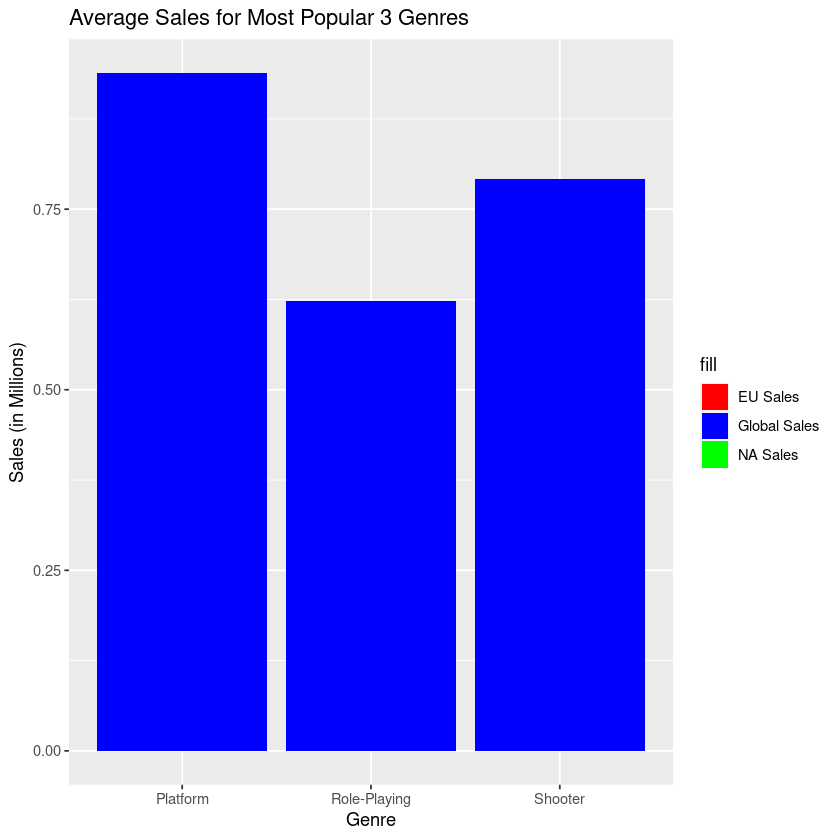

In [29]:
#Plot the data
ggplot(genres, aes(x=Genre)) + 
  geom_bar(aes(y = NA_Sales, fill = "NA Sales"), stat = "identity") +
  geom_bar(aes(y = EU_Sales, fill = "EU Sales"), stat = "identity") +
  geom_bar(aes(y = Global_Sales, fill = "Global Sales"), stat = "identity") +
  scale_fill_manual(values = c("NA Sales" = "green","EU Sales" = "red","Global Sales" = "blue")) +
  ggtitle("Average Sales for Most Popular 3 Genres") +
  xlab("Genre") +
  ylab("Sales (in Millions)")

In [25]:
# Plot the data
ggplot(data, aes(x = Genre, y = NA_Sales, fill = NA_Sales)) +
  geom_bar(stat = "identity") +
  geom_text(data = genres, aes(x = Genre, y = NA_Sales, label = round(NA_Sales, 1)),
            position = position_stack(vjust = 0.5)) +
  scale_fill_continuous(name = "NA Sales (Millions)",
                        labels = scales::comma) +
  geom_bar(aes(x = Genre, y = EU_Sales, fill = EU_Sales)) +
  geom_text(data = genres, aes(x = Genre, y = EU_Sales, label = round(EU_Sales, 1)),
            position = position_stack(vjust = 0.5)) +
  scale_fill_continuous(name = "EU Sales (Millions)",
                        labels = scales::comma) +
  geom_bar(aes(x = Genre, y = Global_Sales, fill = Global_Sales)) +
  geom_text(data = genres, aes(x = Genre, y = Global_Sales, label = round(Global_Sales, 1)),
            position = position_stack(vjust = 0.5)) +
  scale_fill_continuous(name = "Global Sales (Millions)",
                        labels = scales::comma) +
  labs(title = "Average Sales for the Most Popular Three Genres") +
  theme_bw()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing stat.
ℹ Error occurred in the 3rd layer.
Caused by error in `setup_params()`:
! `stat_count()` must only have an x or y aesthetic.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr:

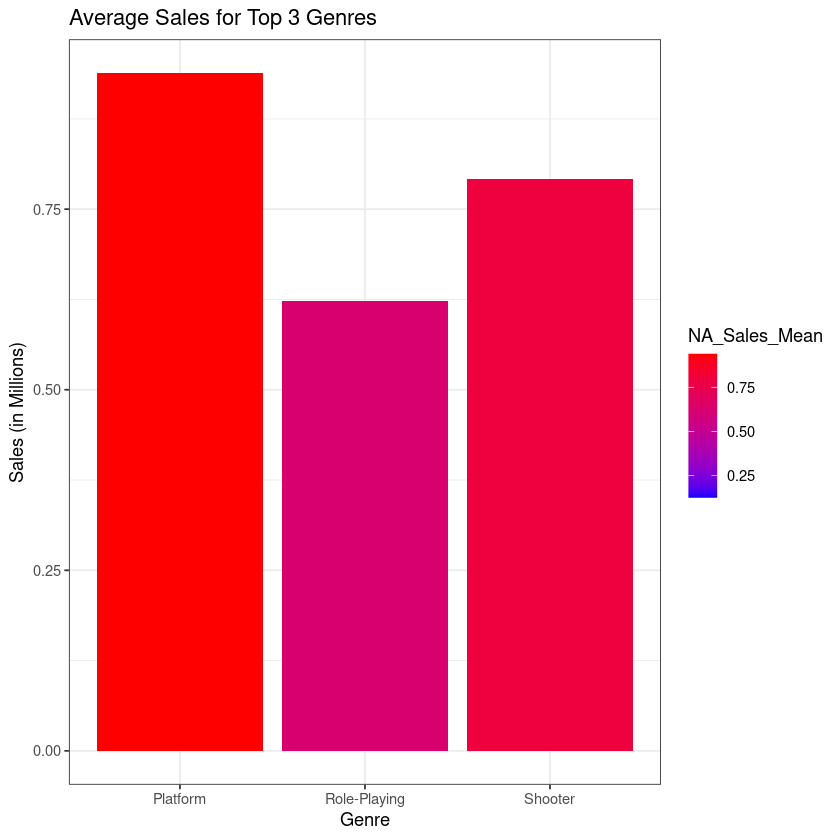

In [35]:
# Create a plot visualizing the average sales for games in the most popular three genres

# Load necessary libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

# Calculate the average sales for each genre
average_sales <- data %>% group_by(Genre) %>% summarise(NA_Sales_Mean = mean(NA_Sales, na.rm = TRUE),EU_Sales_Mean = mean(EU_Sales, na.rm = TRUE),Global_Sales_Mean = mean(Global_Sales, na.rm = TRUE)
  )

# Filter the top 3 genres
top_3_genres <- average_sales %>%
  arrange(desc(Global_Sales_Mean)) %>%
  head(3)

# Create the plot
ggplot(data = top_3_genres, aes(x = Genre, y = Global_Sales_Mean)) +
  geom_col(aes(fill = NA_Sales_Mean)) +
  geom_col(aes(fill = EU_Sales_Mean)) +
  geom_col(aes(fill = Global_Sales_Mean)) +
  labs(title = "Average Sales for Top 3 Genres", x = "Genre", y = "Sales (in Millions)") +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_bw()

In [38]:
# Finding out  are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?
# Get the genre and JP_Sales columns
genre_jp <- data[, c("Genre","JP_Sales")]

# Calculate the mean JP_Sales for each genre
means <- aggregate(genre_jp$JP_Sales, by=list(genre_jp$Genre), FUN=mean)

# Create a data frame with the mean values
df <- data.frame(means)

# Sort the data frame in descending order
df <- df[order(-df$x),]

# Print out the genres with the highest and lowest mean JP_Sales
print("Genres with the highest mean JP_Sales:")
print(head(df))

print("Genres with the lowest mean JP_Sales:")
print(tail(df))

[1] "Genres with the highest mean JP_Sales:"
        Group.1          x
8  Role-Playing 0.23676747
5      Platform 0.14759594
3      Fighting 0.10300708
6        Puzzle 0.09847079
10   Simulation 0.07347174
12     Strategy 0.07262849
[1] "Genres with the lowest mean JP_Sales:"
     Group.1          x
4       Misc 0.06196665
11    Sports 0.05770247
1     Action 0.04823583
7     Racing 0.04538831
2  Adventure 0.04048989
9    Shooter 0.02922137
